# **Deteksi Cyberbullying pada Komentar Instagram menggunakan Algoritma Regresi Logistik: Melindungi Diri dari Kekerasan Digital**
   Dalam era digital saat ini, media sosial seperti Instagram telah menjadi platform yang penting bagi interaksi dan berbagi informasi. Namun, di balik kemudahan akses dan komunikasi yang ditawarkan, keberadaan cyberbullying menjadi ancaman serius. Cyberbullying, yang mencakup tindakan pelecehan, penghinaan, ancaman, dan perilaku beracun lainnya, dapat menyebabkan dampak psikologis yang serius dan mengganggu kehidupan individu yang menjadi korban.

   Dalam upaya untuk mengatasi masalah ini, deteksi cyberbullying pada komentar Instagram menjadi perhatian yang semakin meningkat. Melalui penggunaan metode analisis data dan pembelajaran mesin, seperti algoritma Regresi Logistik, sistem dapat dikembangkan untuk secara otomatis mengidentifikasi dan mengklasifikasikan komentar sebagai cyberbullying atau non-cyberbullying.

   Penelitian ini bertujuan untuk memanfaatkan lebih dari 500 komentar Instagram yang dikumpulkan sebagai dataset, dengan tujuan untuk mengembangkan sebuah sistem deteksi cyberbullying yang efektif. Data ini akan digunakan untuk melatih model Regresi Logistik, yang akan mempelajari pola dan fitur penting dalam komentar yang berkaitan dengan cyberbullying.

![Komentar Jahat Instagram M](https://ners.unair.ac.id/site/images/Lihat/37_depresi.png)

# Import Perpustakaan
---

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Membaca Dataset
---

In [2]:
df = pd.read_csv('/kaggle/input/komentarinstagramm/DATASET CYBERBULLYING INSTAGRAM - FINAL.csv')

In [3]:
df.head()

,Komentar,Kategori,Unnamed: 2,Unnamed: 3
0,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying,NaN,NaN
1,"""makan nasi padang aja begini badannya""",Non-bullying,NaN,NaN
2,"""yang aku suka dari dia adalah selalu cukur je...",Bullying,NaN,NaN
3,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying,NaN,NaN
4,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying,NaN,NaN


In [4]:
df.tail()

,Komentar,Kategori,Unnamed: 2,Unnamed: 3
645,"""aku memutuskan untuk menjadi fans isyana. gil...",Non-bullying,NaN,NaN
646,"""AMZING ISYANAA!! Jujur aku amazed banget deng...",Non-bullying,NaN,NaN
647,"""paling ngiri liat orang keren maen alat musik...",Non-bullying,NaN,NaN
648,"""Sampe ga bisa berkata2 lagi buat isyana, sang...",Non-bullying,NaN,NaN
649,"""Inimah bukan main alat musik lagi. Olahraga j...",Non-bullying,NaN,NaN


In [5]:
df.shape

(650, 4)

# EDA (Exploratory Data Analysis)
---

EDA (Exploratory Data Analysis) adalah proses eksplorasi awal pada suatu dataset untuk memahami karakteristiknya, mengidentifikasi pola, dan menarik wawasan yang dapat membantu dalam pemodelan atau pengambilan keputusan.

# 1. Menangani Nilai Kosong

In [6]:
df.isna().any()

Komentar      False
Kategori      False
Unnamed: 2     True
Unnamed: 3     True
dtype: bool

In [7]:
df.isna().sum()

Komentar        0
Kategori        0
Unnamed: 2    650
Unnamed: 3    649
dtype: int64

# 2. Menangani Nilai Duplikat

In [8]:
df.nunique()

Komentar      650
Kategori        2
Unnamed: 2      0
Unnamed: 3      1
dtype: int64

In [9]:
df['Komentar'].nunique()

650

# 3. Distribusi Kelas

In [10]:
df['Kategori'].value_counts()

Non-bullying    325
Bullying        325
Name: Kategori, dtype: int64

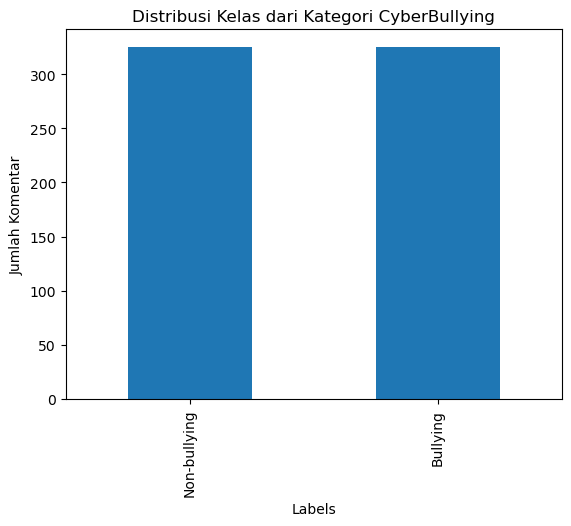

In [11]:
# Create a bar plot of the class distribution
class_counts = df['Kategori'].value_counts()
class_counts.plot(kind='bar')
plt.title('Distribusi Kelas dari Kategori CyberBullying')
plt.xlabel('Labels')
plt.ylabel('Jumlah Komentar')
plt.show()

# 4. Menghitung Kata

In [12]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [13]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['Komentar'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
# Split the text into individual words
words = all_text.split()

In [14]:
# Remove stop words
stop_words = set(stopwords.words('indonesian'))
words = [word for word in words if not word in stop_words]

In [15]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('aja', 62),
 ('lu', 56),
 ('yg', 54),
 ('nya', 53),
 ('ya', 47),
 ('cantik', 43),
 ('banget', 40),
 ('orang', 36),
 ('gak', 36),
 ('kek', 36),
 ('ga', 35),
 ('kayak', 30),
 ('muka', 27),
 ('anjing', 27),
 ('udah', 26),
 ('lo', 25),
 ('kak', 23),
 ('bgt', 22),
 ('kaya', 19),
 ('kalo', 18),
 ('jelek', 17),
 ('foto', 17),
 ('suka', 16),
 ('liat', 16),
 ('sih', 15),
 ('anak', 14),
 ('si', 14),
 ('gini', 13),
 ('udh', 13),
 ('gigi', 13),
 ('gitu', 12),
 ('"Muka', 12),
 ('banget"', 12),
 ('gue', 12),
 ('gua', 11),
 ('sok', 11),
 ('gk', 11),
 ('pas', 11),
 ('biar', 11),
 ('ama', 11),
 ('semoga', 11),
 ('bagus', 11),
 ('sm', 11),
 ('mukanya', 10),
 ('"Udah', 10),
 (',', 10),
 ('tau', 10),
 ('sehat', 10),
 ('LO', 10),
 ('bang', 10),
 ('milih', 10),
 ('"', 9),
 ('emang', 9),
 ('mah', 9),
 ('keliatan', 9),
 ('dah', 9),
 ('babi', 9),
 ('g', 9),
 ('gw', 9),
 ('bidadari', 8),
 ('gausah', 8),
 ('bikin', 8),
 ('komen', 8),
 ('ka', 8),
 ('sukses', 8),
 ('hitam', 8),
 ('semangat', 8),
 ('pake', 8),
 (

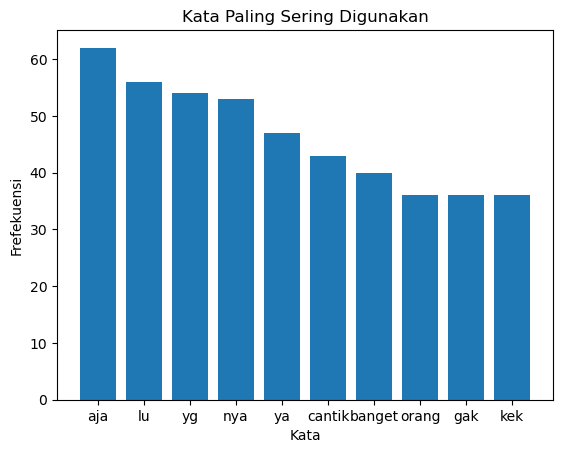

In [16]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Kata')
plt.ylabel('Frefekuensi')
plt.title('Kata Paling Sering Digunakan')
plt.show()

# Visualisasi
---

Visualisasi adalah proses menggambarkan data dan informasi dalam bentuk grafik, diagram, atau tampilan visual lainnya. Tujuan dari visualisasi adalah untuk mengkomunikasikan pola, hubungan, dan wawasan yang terkandung dalam data dengan cara yang mudah dipahami dan menarik bagi pengamat.

# 1. Wordcloud atau Representasi Visual dari Kumpulan Kata

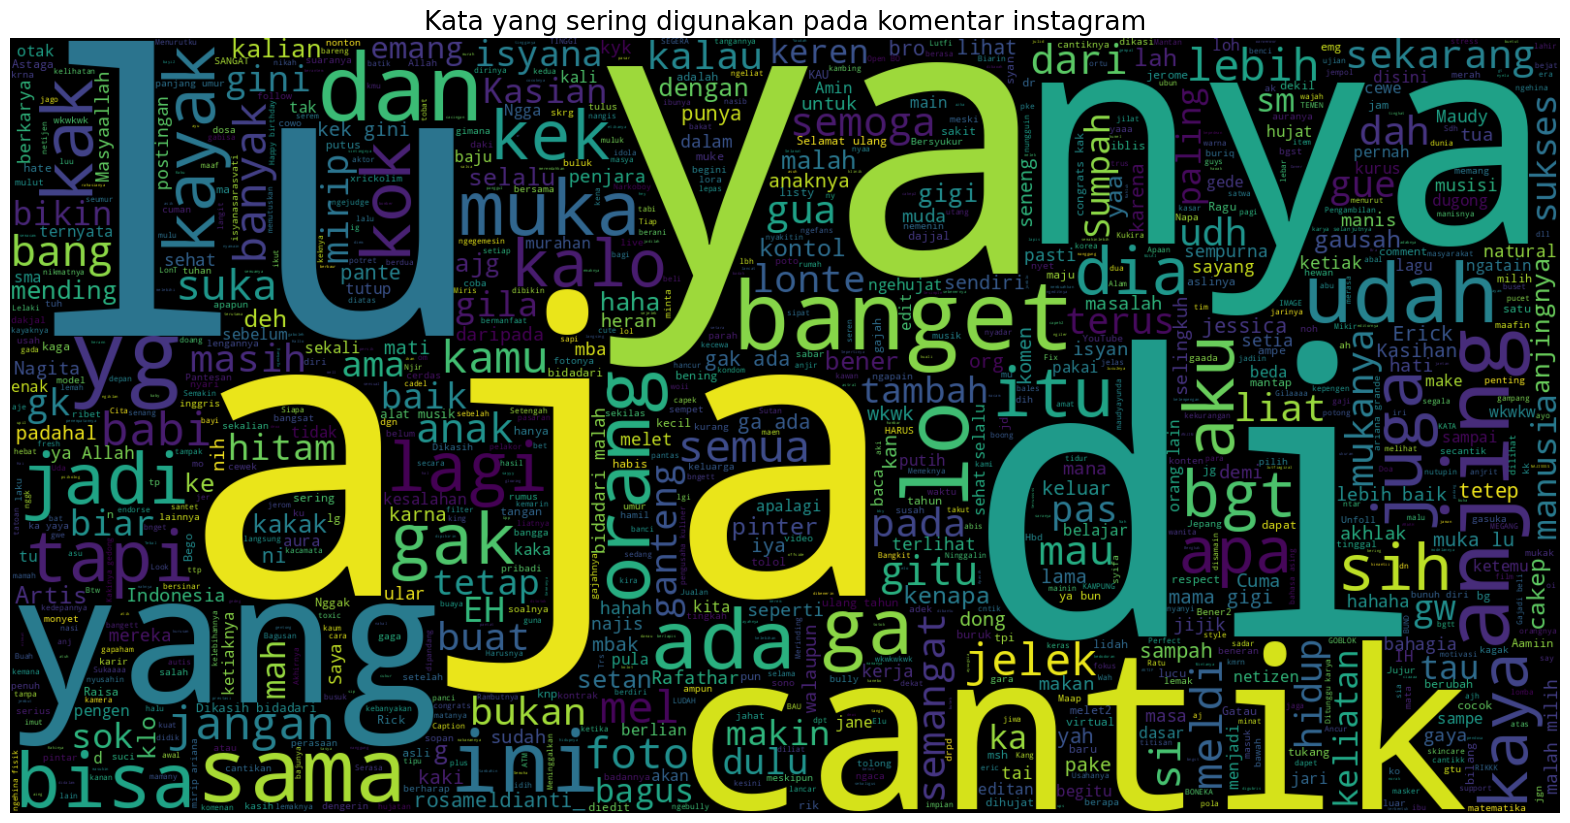

In [17]:
from wordcloud import WordCloud

text = ' '.join([word for word in df['Komentar']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=1000, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Kata yang sering digunakan pada komentar instagram', fontsize=19)
plt.show()

# 2. Plot Analisis Sentimen

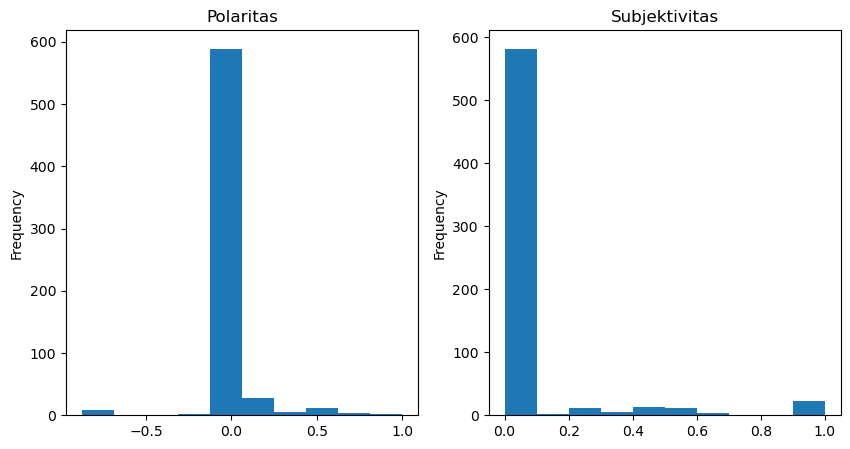

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# perform sentiment analysis on each text in DataFrame
sentiment_scores = []
for text in df['Komentar']:
    analysis = TextBlob(text)
    sentiment_scores.append((analysis.sentiment.polarity, analysis.sentiment.subjectivity))

# create DataFrame with sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores, columns=['polarity', 'subjectivity'])

# plot distribution of sentiment scores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sentiment_df['polarity'].plot(kind='hist', ax=axes[0], title='Polaritas')
sentiment_df['subjectivity'].plot(kind='hist', ax=axes[1], title='Subjektivitas')
plt.show()

# 3. Plot Pengenalan Entitas Bernama

In [19]:
import spacy
from spacy import displacy

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [20]:
#sample text
text = df['Komentar'].iloc[4]

#load pre-trained NER model
nlp = spacy.load('en_core_web_sm')

#perform named entity recognition
doc = nlp(text)

#visualize named entities
displacy.render(doc, style='ent', jupyter=True)

# 4. Plot Penandaan Part-of-Speech

In [21]:
import spacy
from spacy import displacy

#sample text
text = df['Komentar'].iloc[1]

#load pre-trained POS tagging model
nlp = spacy.load('en_core_web_sm')

#perform POS tagging
doc = nlp(text)

#visualize POS tagging
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

# 5. Visualisasi Pemodelan Topik

In [22]:
!pip install pyLDAvis

In [23]:
import gensim
import pyLDAvis 
from pyLDAvis import *
import pyLDAvis.gensim as gensimvis

# Preprocessing
tokens = [[word for word in sentence.split()] for sentence in df['Kategori']]
dictionary = gensim.corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

# Topic Modeling
num_topics = 10
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

/opt/conda/lib/python3.10/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_max

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
7      0.363025  0.0       1        1  12.883456
9      0.361364  0.0       2        1  12.500059
3     -0.323522  0.0       3        1  11.922606
8     -0.318117  0.0       4        1  11.614987
2     -0.324936  0.0       5        1  11.384443
6      0.324495  0.0       6        1  11.076697
4     -0.320480  0.0       7        1  10.076710
1      0.253659  0.0       8        1   8.538784
0     -0.130830  0.0       9        1   5.001135
5      0.115342  0.0      10        1   5.001124, topic_info=           Term        Freq       Total Category  logprob  loglift
0  Non-bullying  318.000000  318.000000  Default   2.0000   2.0000
1      Bullying  331.000000  331.000000  Default   1.0000   1.0000
0  Non-bullying   83.686494  318.737909   Topic1  -0.0007   0.7119
1      Bullying    0.055966  331.262093   Topic1  -7.3108  -6.6367
0  Non-bullying   81.159719  318.737909   Topic2  -0.0011   0.7115
1      Bullying    0.090667  331.262093   Topic2  -6.7981  -6.1240
1      Bullying   77.394171  331.262093   Topic3  -0.0013   0.6727
0  Non-bullying    0.102767  318.737909   Topic3  -6.6255  -5.9129
1      Bullying   75.265224  331.262093   Topic4  -0.0031   0.6710
0  Non-bullying    0.232189  318.737909   Topic4  -5.7843  -5.0717
1      Bullying   73.931217  331.262093   Topic5  -0.0009   0.6731
0  Non-bullying    0.067664  318.737909   Topic5  -6.9972  -6.2846
0  Non-bullying   70.878965  318.737909   Topic6  -0.0157   0.6969
1      Bullying    1.119569  331.262093   Topic6  -4.1637  -3.4896
1      Bullying   65.349265  331.262093   Topic7  -0.0023   0.6718
0  Non-bullying    0.149347  318.737909   Topic7  -6.0835  -5.3709
0  Non-bullying   52.173656  318.737909   Topic8  -0.0618   0.6508
1      Bullying    3.328438  331.262093   Topic8  -2.8139  -2.1399
1      Bullying   27.201605  331.262093   Topic9  -0.1782   0.4959
0  Non-bullying    5.305774  318.737909   Topic9  -1.8127  -1.1001
0  Non-bullying   24.981333  318.737909  Topic10  -0.2633   0.4493
1      Bullying    7.525973  331.262093  Topic10  -1.4631  -0.7890, token_table=      Topic      Freq          Term
term                               
1         3  0.232444      Bullying
1         4  0.226407      Bullying
1         5  0.223388      Bullying
1         6  0.003019      Bullying
1         7  0.196219      Bullying
1         8  0.009056      Bullying
1         9  0.081506      Bullying
1        10  0.024150      Bullying
0         1  0.263539  Non-bullying
0         2  0.254127  Non-bullying
0         6  0.222754  Non-bullying
0         8  0.163143  Non-bullying
0         9  0.015687  Non-bullying
0        10  0.078434  Non-bullying, R=2, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 4, 9, 3, 7, 5, 2, 1, 6])

# Natural Language Processing atau Pemrosesan Bahasa Alami
---

Pemrosesan Bahasa Alami (Natural Language Processing/NLP) adalah bidang studi yang fokus pada interaksi antara komputer dan bahasa manusia dalam konteks bahasa Indonesia. NLP melibatkan pengembangan algoritma dan teknik untuk memungkinkan komputer memahami, menafsirkan, dan menghasilkan bahasa manusia dengan cara yang bermakna dan berguna.
NLP menggabungkan elemen dari ilmu komputer, linguistik, dan kecerdasan buatan untuk memungkinkan mesin memproses dan menganalisis data bahasa alami.

# 1. Pembersihan Data

In [24]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    
    # Remove URLs, mentions, and hashtags from the text
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('indonesian')]
    
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [25]:
%%time

tqdm.pandas()

df['cleaned_text'] = df['Komentar'].progress_apply(clean_text)

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

  0%|          | 0/650 [00:00<?, ?it/s]

CPU times: user 2.22 s, sys: 118 ms, total: 2.34 s
Wall time: 2.34 s


# 2. Ekstraksi Fitur

In [26]:
# Create the Bag of Words model
cv = CountVectorizer()
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['Kategori']

In [27]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Klasifikasi Model
---

Klasifikasi model adalah jenis model dalam machine learning yang digunakan untuk memprediksi kelas atau label dari data input. Model ini mempelajari pola-pola yang terdapat dalam data pelatihan dan menggunakan pola tersebut untuk mengklasifikasikan data baru ke dalam kategori atau kelas yang tepat.

# 1. Model Logistik Regresi

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression(max_iter = 1000)

In [29]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 2. Prediksi

In [30]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
y_pred

array(['Bullying', 'Bullying', 'Bullying', 'Bullying', 'Non-bullying',
       'Non-bullying', 'Bullying', 'Non-bullying', 'Non-bullying',
       'Bullying', 'Non-bullying', 'Non-bullying', 'Bullying',
       'Non-bullying', 'Bullying', 'Bullying', 'Bullying', 'Non-bullying',
       'Bullying', 'Bullying', 'Bullying', 'Non-bullying', 'Bullying',
       'Non-bullying', 'Non-bullying', 'Non-bullying', 'Bullying',
       'Non-bullying', 'Non-bullying', 'Non-bullying', 'Non-bullying',
       'Bullying', 'Bullying', 'Non-bullying', 'Non-bullying', 'Bullying',
       'Bullying', 'Non-bullying', 'Bullying', 'Bullying', 'Bullying',
       'Bullying', 'Non-bullying', 'Non-bullying', 'Bullying',
       'Non-bullying', 'Bullying', 'Bullying', 'Non-bullying', 'Bullying',
       'Non-bullying', 'Non-bullying', 'Non-bullying', 'Bullying',
       'Non-bullying', 'Bullying', 'Bullying', 'Non-bullying',
       'Non-bullying', 'Bullying', 'Non-bullying', 'Bullying',
       'Non-bullying', 'Bullying', 'Bu

# 3. Akurasi

In [31]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8307692307692308


# 4. Matriks Konfusi

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[52, 10],
       [12, 56]])

<Axes: >

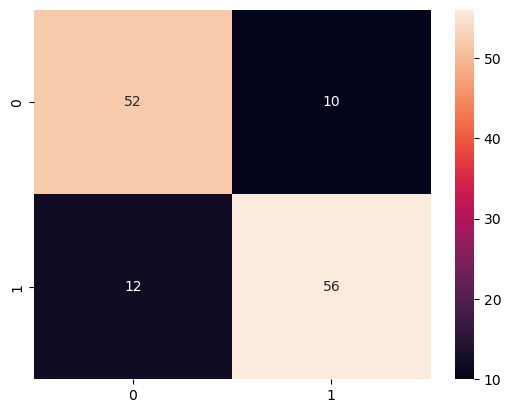

In [33]:
import seaborn as sns
sns.heatmap(cm, annot=True)

# 5. Laporan Klasifikasi

In [34]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Bullying       0.81      0.84      0.83        62
Non-bullying       0.85      0.82      0.84        68

    accuracy                           0.83       130
   macro avg       0.83      0.83      0.83       130
weighted avg       0.83      0.83      0.83       130



# **Kesimpulan**
Deteksi cyberbullying pada komentar Instagram menggunakan pendekatan regresi logistik telah terbukti menjadi metode yang efektif dalam melindungi pengguna dari kekerasan digital. Dalam era digital saat ini, kekerasan digital atau cyberbullying telah menjadi masalah serius yang berdampak negatif pada kesejahteraan mental dan emosional individu.

Dengan menggunakan pendekatan regresi logistik, sistem deteksi yang dikembangkan dapat melakukan klasifikasi komentar sebagai cyberbullying atau non-cyberbullying. Melalui analisis fitur-fitur yang diekstraksi dari komentar, model regresi logistik dapat mempelajari pola dan hubungan antara fitur-fitur tersebut untuk melakukan prediksi dengan akurasi yang tinggi.

Pendekatan regresi logistik dalam deteksi cyberbullying ini memberikan kontribusi penting dalam menciptakan lingkungan online yang lebih aman dan positif. Dengan kemampuan untuk mengklasifikasikan komentar secara otomatis, sistem regresi logistik membantu melindungi pengguna dari dampak negatif cyberbullying dan mendorong interaksi yang lebih sehat di platform media sosial seperti Instagram.

# Thank You
**Credit:**
Fildzah Khalishah Ghassani E1E121026